In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [3]:
demo = pd.read_csv('wisc_bc_data.csv')
demo = demo.drop('id', axis=1)

In [4]:
demo.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [6]:
y = demo['diagnosis']
X = demo.drop('diagnosis', axis=1)

In [7]:
sc = StandardScaler()

In [9]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=4)
knn=KNeighborsClassifier(n_neighbors=5)
sc.fit(Xtrain)
scaledXtrain = sc.transform(Xtrain)
scaledXtest = sc.transform(Xtest)
knn.fit(scaledXtrain, ytrain)
print('what is testing accuracy')
print(knn.score(scaledXtest, ytest))
print('what is training accuracy')
print(knn.score(scaledXtrain, ytrain))

what is testing accuracy
0.956140350877193
what is training accuracy
0.9802197802197802


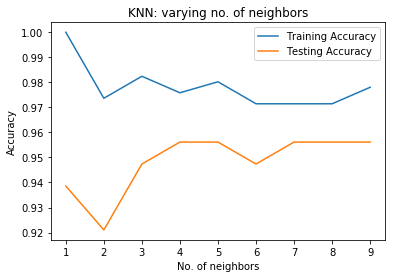

In [17]:
import matplotlib.pyplot as plt
neighbors = np.arange(1,10)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20, random_state=4)
    sc = StandardScaler()
    scaledXtrain = sc.fit_transform(Xtrain)
    scaledXtest = sc.transform(Xtest)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledXtrain, ytrain)
    train_accuracy_plot[i] = knn.score(scaledXtrain, ytrain)
    test_accuracy_plot[i] = knn.score(scaledXtest, ytest)
# Generating plot
plt.title('KNN: varying no. of neighbors')
plt.plot(neighbors, train_accuracy_plot, label= 'Training Accuracy')
plt.plot(neighbors, test_accuracy_plot, label= 'Testing Accuracy')
plt.legend()
plt.xlabel('No. of neighbors')
plt.ylabel('Accuracy')
plt.show()